<a href="https://colab.research.google.com/github/DiaaHSharqawi/3legant-Ecommerce-Frontend-Website/blob/main/Solution_of_Section_2_Homework_2_Comprehensive_Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Section 2: Homework 2: Comprehensive Data Cleaning and Analysis - Diaa Sharqawi

### Introduction  
In this homework, I worked with the **Titanic dataset** to clean, transform, and analyze passenger information. The tasks focused on:  

- Handling missing data and standardizing formats.  
- Grouping and merging data.  
- Creating pivot tables for deeper insights.  
- Engineering new features and managing outliers.  

The goal of this assignment was to practice applying **Pandas techniques** to a real-world dataset, building skills in data wrangling and exploratory analysis.  


---

## 🚢 1. Getting Started and Data Cleaning

### Instructions
1.  Import the **Pandas** library.

2.  Load the Titanic dataset from the specified URL:
      
      The Titanic dataset was loaded from the specified URL by using the Pandas function `.read_csv()`, which allows us to directly pass a file path or a URL pointing to a CSV file.

3. Apply Summary Statistics

    After loading the dataset, I applied summary statistics using the `.describe()` and `.info()` functions.

    This step helped me:

    - Understand the structure of the dataset (number of rows, columns, and data types).  
    - Detect missing values in different columns.  
    - Get key statistics such as `mean`, `median`, `minimum`, `maximum`, and `standard deviation` for numerical columns.





In [ ]:
# Your code for getting started and data cleaning here
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# display first 5 rows
display(titanic_df)

# .info(): To check structure of the dataset
titanic_df.info()

# .describe(): Numeric summary (mean, std, min, max, etc.)
titanic_df.describe(include = "all")

# .isnull().any(): to check null values
titanic_df.isnull().any()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


3.  Perform the initial data cleaning:
    * Impute missing `Age` values with the **median**:
       
        * I filled missing `Age` values using `.fillna()`, replacing them with the median calculated by the Pandas `.median()` function.  
        This ensures the `Age` column has no missing values.

    * Fill missing `Embarked` values with the **mode** (the most frequent value).
    * Drop the `Cabin` column entirely.
4.  Display the first 10 rows of the cleaned DataFrame to verify your work.

In [ ]:
# Count number of missing 'Age' values before Impute missing Age with the median
missing_age = titanic_df['Age'].isnull().sum()
print(f"number of missing_age: {missing_age}")

# get rows of missing 'Age' values
titanic_df[titanic_df['Age'].isna()]


number of missing_age: 177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# Impute missing Age with the median

# Calculate median for 'Age'
age_median = titanic_df['Age'].median()
print(f"age_median: {age_median}")

# Replace missing Age with the median
titanic_df['Age'] = titanic_df['Age'].fillna(age_median)

age_median: 28.0


In [ ]:
# Count number of missing 'Age' values after missing Age with the median
missing_age = titanic_df['Age'].isnull().sum()
print(f"number of missing_age: {missing_age}")

# get rows of missing 'Age' values
titanic_df[titanic_df['Age'].isna()]


number of missing_age: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


3.  CONT. Perform the initial data cleaning:

    * Fill missing `Embarked` values with the **mode** (the most frequent value):
      * I filled missing `Embarked` values with the **mode** using `.mode()` to find the most common value and `.fillna()` to replace the missing entries.

In [ ]:
# Count number of missing 'Embarked' values before fill missing Embarked with the mode
missing_embarked  = titanic_df['Embarked'].isnull().sum()
print(f"number of missing_embarked before fill the missing values : {missing_embarked}")

# get rows of missing 'Embarked' values
titanic_df[titanic_df['Embarked'].isna()]

number of missing_embarked before fill the missing values : 2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# Fill missing Embarked with the mode

mode_value = titanic_df['Embarked'].mode()[0]
print(f"mode_value: {mode_value}")

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_value)

mode_value: S


In [ ]:
# Count number of missing 'Embarked' values after fill missing Embarked with the mode
missing_embarked  = titanic_df['Embarked'].isnull().sum()
print(f"number of missing_embarked values after fill the missing values: {missing_embarked}")

# get rows of missing 'Embarked' values
titanic_df[titanic_df['Embarked'].isna()]

number of missing_embarked values after fill the missing values: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


3.  CONT. Perform the initial data cleaning:
    * I dropped the `Cabin` column entirely using the `.drop()` function.

In [ ]:
titanic_df = titanic_df.drop(columns = 'Cabin')
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


4.  Display the first 10 rows of the cleaned DataFrame to verify your work.


In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


---

## 📊 2. Grouping and Merging

### Instructions
1.  Group the cleaned DataFrame by `Pclass`.
    
    - I grouped the cleaned DataFrame by `Pclass` using the `.groupby()` function.



In [ ]:
# Your code for grouping and merging here
display(titanic_df)

grouped_by_class = titanic_df.groupby("Pclass")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


2.  Calculate the **mean `Fare`** and the **count of passengers** for each class. *Hint: `.agg()` can be useful here.*

    - I used the `.agg()` function to apply multiple aggregation operations (mean, count, etc.) on grouped data.

In [ ]:
# Note: To get a passenger count, you can count any column, like 'PassengerId'
grouped_by_class_stat = grouped_by_class.agg({
    'Fare': 'mean',
    'PassengerId': 'count'
})
display(grouped_by_class_stat)

,Fare,PassengerId
Pclass,,
1,84.154687,216
2,20.662183,184
3,13.675550,491


3.  Create a second, small DataFrame that maps `Pclass` values to a `ClassDescription` (e.g., 1 to "Upper", 2 to "Middle", 3 to "Lower").
4.  **Merge** your grouped data with this new DataFrame to add the descriptive class names.
    - I merged my grouped data with the new DataFrame containing descriptive class names using the `pd.merge()` function.  

5.  Display the final merged DataFrame.

In [ ]:

class_description_dict = {
    'Pclass': [1, 2, 3],
    'ClassDescription': ['Upper', 'Middle', 'Lower']
}
class_desc_df = pd.DataFrame(class_description_dict)
display(class_desc_df)

# Merge the Titanic DataFrame with the class description DataFrame
# 'Pclass' as the key.
# type of merge is left join will take all the common elements btw 2 sets and also the remaining elements from the left
merged_class_df = pd.merge(titanic_df, class_desc_df, on = "Pclass", how = "left")

# Display the final merged DataFrame.
display(merged_class_df)

,Pclass,ClassDescription
0,1,Upper
1,2,Middle
2,3,Lower


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ClassDescription
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Lower
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Upper
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Lower
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Upper
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Middle
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Upper
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Lower
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Upper


---

## 🔀 3. Creating a Pivot Table

### Instructions
1.  Create a **pivot table** from the cleaned `titanic_df`.
2.  The pivot table should show the **mean `Fare`**.
3.  Use `Embarked` for the **rows** (index) and `Sex` for the **columns**.
   
     * I used `pd.pivot_table()` with Survived as values, Sex as the index, and Pclass as columns.




4.  Fill any missing values (`NaN`) in the resulting pivot table with `0`.
5.  Display the pivot table.

In [ ]:
# Your code for creating a pivot table here
pivot_table = titanic_df.pivot_table(index = "Embarked", columns = "Sex", aggfunc ="mean", values = "Fare")

# Fill any missing values (NaN) in the resulting pivot table with 0.
pivot_table = pivot_table.fillna(0)
display(pivot_table)

Sex,female,male
Embarked,,
C,75.169805,48.262109
Q,12.634958,13.838922
S,39.143456,21.711996


---

## ✨ 4. Feature Engineering and Outlier Handling

### Instructions
1.  **Feature Engineering**: Create a new `TravelGroup` column in `titanic_df`. This column should categorize passengers based on their total family size (`SibSp` + `Parch` + 1).
    * **"Solo"**: Family size of 1.
    * **"Small"**: Family size of 2 or 3.
    * **"Large"**: Family size of 4 or more.


      - We want to categorize passengers based on the total number of people traveling with them.
      
      `GroupSize = SibSp + Parch + 1`




In [ ]:
# 1. Feature Engineering: Create the TravelGroup column
# Calculate total family size

titanic_df['GroupSize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

#### categorize_group function
We define a function called categorize_group that takes the group size as input and returns the corresponding category. Then we use .apply() to apply this function to each row in the GroupSize column:

In [ ]:
def categorize_group(size):
    if size == 1:
        return "Solo"
    elif size in [2, 3]:
        return "Small"
    else:
        return "Large"

Then we used apply() to run a custom function on each value of FamilySize and create a new categorical colum

In [ ]:
titanic_df['TravelGroup'] = titanic_df['GroupSize'].apply(categorize_group)
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GroupSize,TravelGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,Solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,Solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,Large
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,Solo


2.  **Outlier Handling**: Document your chosen method for handling outliers in the `Fare` column in the markdown cell below. Then, apply this method to your DataFrame.

    - I chose the IQR (Interquartile Range) method to handle outliers in the Fare column because it is robust to skewed data

    - Steps:

      - Calculate Q1 (25th percentile) and Q3 (75th percentile)

      - Compute IQR = Q3 − Q1

      - Define lower and upper bound

      - Clip the Fare values to these bounds using `clip()` to cap extreme values without removing any rows.

      - `quantile()` is used to find Q1 and Q3, which represent the 25th and 75th percentiles of the data.

      - `clip()` limits Fare values to the lower and upper bounds, reducing outlier effects without removing row

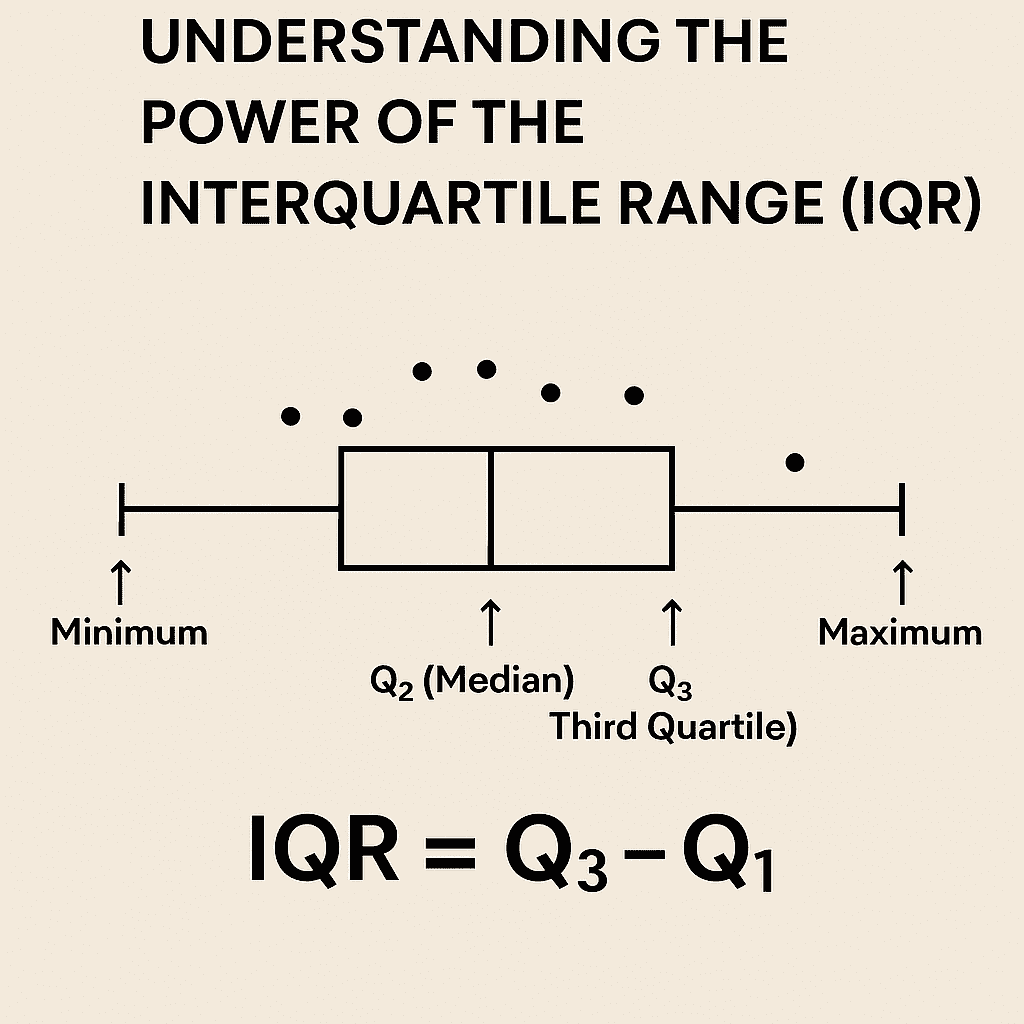

In [ ]:
# 2. Outlier Handling: Apply your chosen method to the 'Fare' column

# IQR calculation
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Clip Fare values to remove extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_df['Fare'] = titanic_df['Fare'].clip(lower=lower_bound, upper=upper_bound)


3.  **Final Summary**:
    * Display the first 10 rows of the DataFrame with the new `TravelGroup` column and adjusted `Fare`.
   
   
    * Create a dictionary called `summary_stats` to store at least two summary statistics (e.g., mean `Fare` after outlier handling, number of "Solo" travelers).


In [ ]:
# display the data frame
titanic_df.head(10)

# Calculate the mean of fare :
mean_fare = titanic_df['Fare'].mean()

summary_stats = {
    'mean_fare_after_outlier_handling': mean_fare,
    'solo_travelers': (titanic_df['TravelGroup'] == 'Solo').sum()
}
summary_stats

{'mean_fare_after_outlier_handling': np.float64(24.04681335578002),
 'solo_travelers': np.int64(537)}

---

## ✅ Self-Assessment

Run the cell below to check your work. This script will evaluate the key components of your assignment and provide a score and feedback. **Make sure you have run all the cells above this one first.**

In [ ]:
#@title Run this cell to check your work
import pandas as pd
from IPython.display import display, Markdown

def check_homework():
    """Checks the student's work and provides feedback."""
    score = 0
    total_points = 5
    feedback = []

    # Check 1: Data Cleaning
    try:
        if 'titanic_df' in globals() and isinstance(titanic_df, pd.DataFrame):
            cabin_dropped = 'Cabin' not in titanic_df.columns
            age_imputed = titanic_df['Age'].notna().all()
            embarked_filled = titanic_df['Embarked'].notna().all()
            if cabin_dropped and age_imputed and embarked_filled:
                score += 1
                feedback.append("- ✅ **Task 1 (Cleaning):** Passed. DataFrame is loaded and initial cleaning is correct.")
            else:
                error_msgs = []
                if not cabin_dropped: error_msgs.append("'Cabin' column not dropped")
                if not age_imputed: error_msgs.append("'Age' has missing values")
                if not embarked_filled: error_msgs.append("'Embarked' has missing values")
                feedback.append(f"- ❌ **Task 1 (Cleaning):** Incomplete. Issues found: {', '.join(error_msgs)}.")
        else:
            feedback.append("- ❌ **Task 1 (Cleaning):** Failed. DataFrame named `titanic_df` not found.")
    except Exception as e:
        feedback.append(f"- ❌ **Task 1 (Cleaning):** An error occurred: {e}")

    # Check 2: Grouping and Merging
    try:
        if 'merged_class_df' in globals() and isinstance(merged_class_df, pd.DataFrame):
            required_cols = ['Pclass', 'Fare', 'ClassDescription']
            # Accommodate different possible names for the count column
            count_col_present = any(col in merged_class_df.columns for col in ['PassengerId', 'Survived', 'Name'])
            if all(c in merged_class_df.columns for c in required_cols) and count_col_present:
                score += 1
                feedback.append("- ✅ **Task 2 (Grouping/Merging):** Passed. Grouping and merging were successful.")
            else:
                feedback.append("- ❌ **Task 2 (Grouping/Merging):** Failed. `merged_class_df` is missing required columns.")
        else:
            feedback.append("- ❌ **Task 2 (Grouping/Merging):** Failed. DataFrame `merged_class_df` not found.")
    except Exception as e:
        feedback.append(f"- ❌ **Task 2 (Grouping/Merging):** An error occurred: {e}")

    # Check 3: Pivot Table
    try:
        if 'pivot_table' in globals() and isinstance(pivot_table, pd.DataFrame):
            index_ok = pivot_table.index.name == 'Embarked'
            cols_ok = 'male' in pivot_table.columns and 'female' in pivot_table.columns
            nan_ok = not pivot_table.isna().any().any()
            if index_ok and cols_ok and nan_ok:
                score += 1
                feedback.append("- ✅ **Task 3 (Pivot Table):** Passed. Pivot table has the correct structure and no missing values.")
            else:
                feedback.append("- ❌ **Task 3 (Pivot Table):** Failed. Check index, columns, or missing value handling.")
        else:
            feedback.append("- ❌ **Task 3 (Pivot Table):** Failed. DataFrame `pivot_table` not found.")
    except Exception as e:
        feedback.append(f"- ❌ **Task 3 (Pivot Table):** An error occurred: {e}")

    # Check 4: Feature Engineering
    try:
        if 'titanic_df' in globals() and 'TravelGroup' in titanic_df.columns:
            expected_values = {"Solo", "Small", "Large"}
            actual_values = set(titanic_df['TravelGroup'].unique())
            if actual_values.issubset(expected_values):
                score += 1
                feedback.append("- ✅ **Task 4 (Feature Engineering):** Passed. `TravelGroup` column created correctly.")
            else:
                feedback.append("- ❌ **Task 4 (Feature Engineering):** Failed. `TravelGroup` contains unexpected values.")
        else:
            feedback.append("- ❌ **Task 4 (Feature Engineering):** Failed. `TravelGroup` column not found in `titanic_df`.")
    except Exception as e:
        feedback.append(f"- ❌ **Task 4 (Feature Engineering):** An error occurred: {e}")

    # Check 5: Summary Stats
    try:
        if 'summary_stats' in globals() and isinstance(summary_stats, dict):
            if len(summary_stats) >= 2:
                score += 1
                feedback.append("- ✅ **Task 5 (Summary Stats):** Passed. `summary_stats` dictionary is created with at least two entries.")
            else:
                feedback.append("- ❌ **Task 5 (Summary Stats):** Failed. Dictionary must contain at least two stats.")
        else:
            feedback.append("- ❌ **Task 5 (Summary Stats):** Failed. Dictionary `summary_stats` not found.")
    except Exception as e:
        feedback.append(f"- ❌ **Task 5 (Summary Stats):** An error occurred: {e}")

    # Final Feedback
    final_message = "**Homework Self-Assessment Feedback:**\n\n" + "\n".join(feedback)
    final_message += f"\n\n### **Final Score: {score}/{total_points}**"
    if score == total_points:
        final_message += "\n\nExcellent work! All checks passed."
    else:
        final_message += "\n\nSome tasks need revision. Please review the feedback above."

    display(Markdown(final_message))

check_homework()

**Homework Self-Assessment Feedback:**

- ✅ **Task 1 (Cleaning):** Passed. DataFrame is loaded and initial cleaning is correct.
- ✅ **Task 2 (Grouping/Merging):** Passed. Grouping and merging were successful.
- ✅ **Task 3 (Pivot Table):** Passed. Pivot table has the correct structure and no missing values.
- ✅ **Task 4 (Feature Engineering):** Passed. `TravelGroup` column created correctly.
- ✅ **Task 5 (Summary Stats):** Passed. `summary_stats` dictionary is created with at least two entries.

### **Final Score: 5/5**

Excellent work! All checks passed.